In [2]:
# Core scverse libraries
import scanpy as sc
import anndata as ad
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Set seed
import random
random.seed(1)

# PROGENy
import decoupler as dc

In [3]:
# Figure settings and figure directory 
sc.settings.set_figure_params(dpi=250, facecolor="white", figsize = (12, 12))
sc.settings.figdir = 'YOUR_PATH_HERE'

In [4]:
# Load in the Anndata object
adata = sc.read_h5ad('YOUR_PATH_HERE')
adata

AnnData object with n_obs × n_vars = 24847 × 18532
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'n_genes', 'S_score', 'G2M_score', 'phase', 'check_cat', 'checkcat', '_scvi_batch', '_scvi_labels', 'leiden_res_0.00', 'leiden_res_0.03', 'leiden_res_0.05', 'leiden_res_0.08', 'leiden_res_0.10', 'leiden_res_0.12', 'leiden_res_0.15', 'leiden_res_0.18', 'leiden_res_0.20', 'leiden_res_0.23', 'leiden_res_0.25', 'leiden_res_0.28', 'leiden_res_0.30', 'leiden_res_0.33', 'leiden_res_0.35', 'leiden_res_0.38', 'leiden_res_0.40', 'leiden_res_0.43', 'leiden_res_0.45', 'leiden_res_0.48', 'leiden_res_0.50', 'leiden_res_0.53', 'leiden_res_0.55', 'leiden_res_0.58', 'leiden_res_0.60', 'leiden_res_0.62', 'leiden_res_0.65', 'leiden_res_0.68', 'leiden_res_0.70', 'leiden_res_0.73', 'leiden_res_0.75', 'leiden_res_0.78', 'leiden_res_0.80', 'leiden_res_0.83', 'leiden_res_0.85', 'leiden_res_0.88', 'leiden_res_0.90', 'leiden_res_0.93', 'leiden_res_0.

In [8]:
# Generate PROGENy Scores
test_obj = adata

# Load the PROGENy pathway-gene interaction network
progeny = dc.get_progeny(organism='human', top=500)
progeny

# Run a multivariate linear model (MLM) to estimate pathway activity
dc.run_mlm(
    mat=test_obj,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True,
    use_raw=False
)

test_obj.obsm['mlm_estimate']

test_obj.obsm['progeny_mlm_estimate'] = test_obj.obsm['mlm_estimate'].copy()
test_obj.obsm['progeny_mlm_pvals'] = test_obj.obsm['mlm_pvals'].copy()
test_obj

# Convert MLM results into a tidy DataFrame format for plotting or analysis
acts = dc.get_acts(test_obj, obsm_key='mlm_estimate')
acts

686 features of mat are empty, they will be removed.
Running mlm on mat with 24847 samples and 17846 targets for 14 sources.


  0%|          | 0/3 [00:00<?, ?it/s]

AnnData object with n_obs × n_vars = 24847 × 14
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'n_genes', 'S_score', 'G2M_score', 'phase', 'check_cat', 'checkcat', '_scvi_batch', '_scvi_labels', 'leiden_res_0.00', 'leiden_res_0.03', 'leiden_res_0.05', 'leiden_res_0.08', 'leiden_res_0.10', 'leiden_res_0.12', 'leiden_res_0.15', 'leiden_res_0.18', 'leiden_res_0.20', 'leiden_res_0.23', 'leiden_res_0.25', 'leiden_res_0.28', 'leiden_res_0.30', 'leiden_res_0.33', 'leiden_res_0.35', 'leiden_res_0.38', 'leiden_res_0.40', 'leiden_res_0.43', 'leiden_res_0.45', 'leiden_res_0.48', 'leiden_res_0.50', 'leiden_res_0.53', 'leiden_res_0.55', 'leiden_res_0.58', 'leiden_res_0.60', 'leiden_res_0.62', 'leiden_res_0.65', 'leiden_res_0.68', 'leiden_res_0.70', 'leiden_res_0.73', 'leiden_res_0.75', 'leiden_res_0.78', 'leiden_res_0.80', 'leiden_res_0.83', 'leiden_res_0.85', 'leiden_res_0.88', 'leiden_res_0.90', 'leiden_res_0.93', 'leiden_res_0.95'

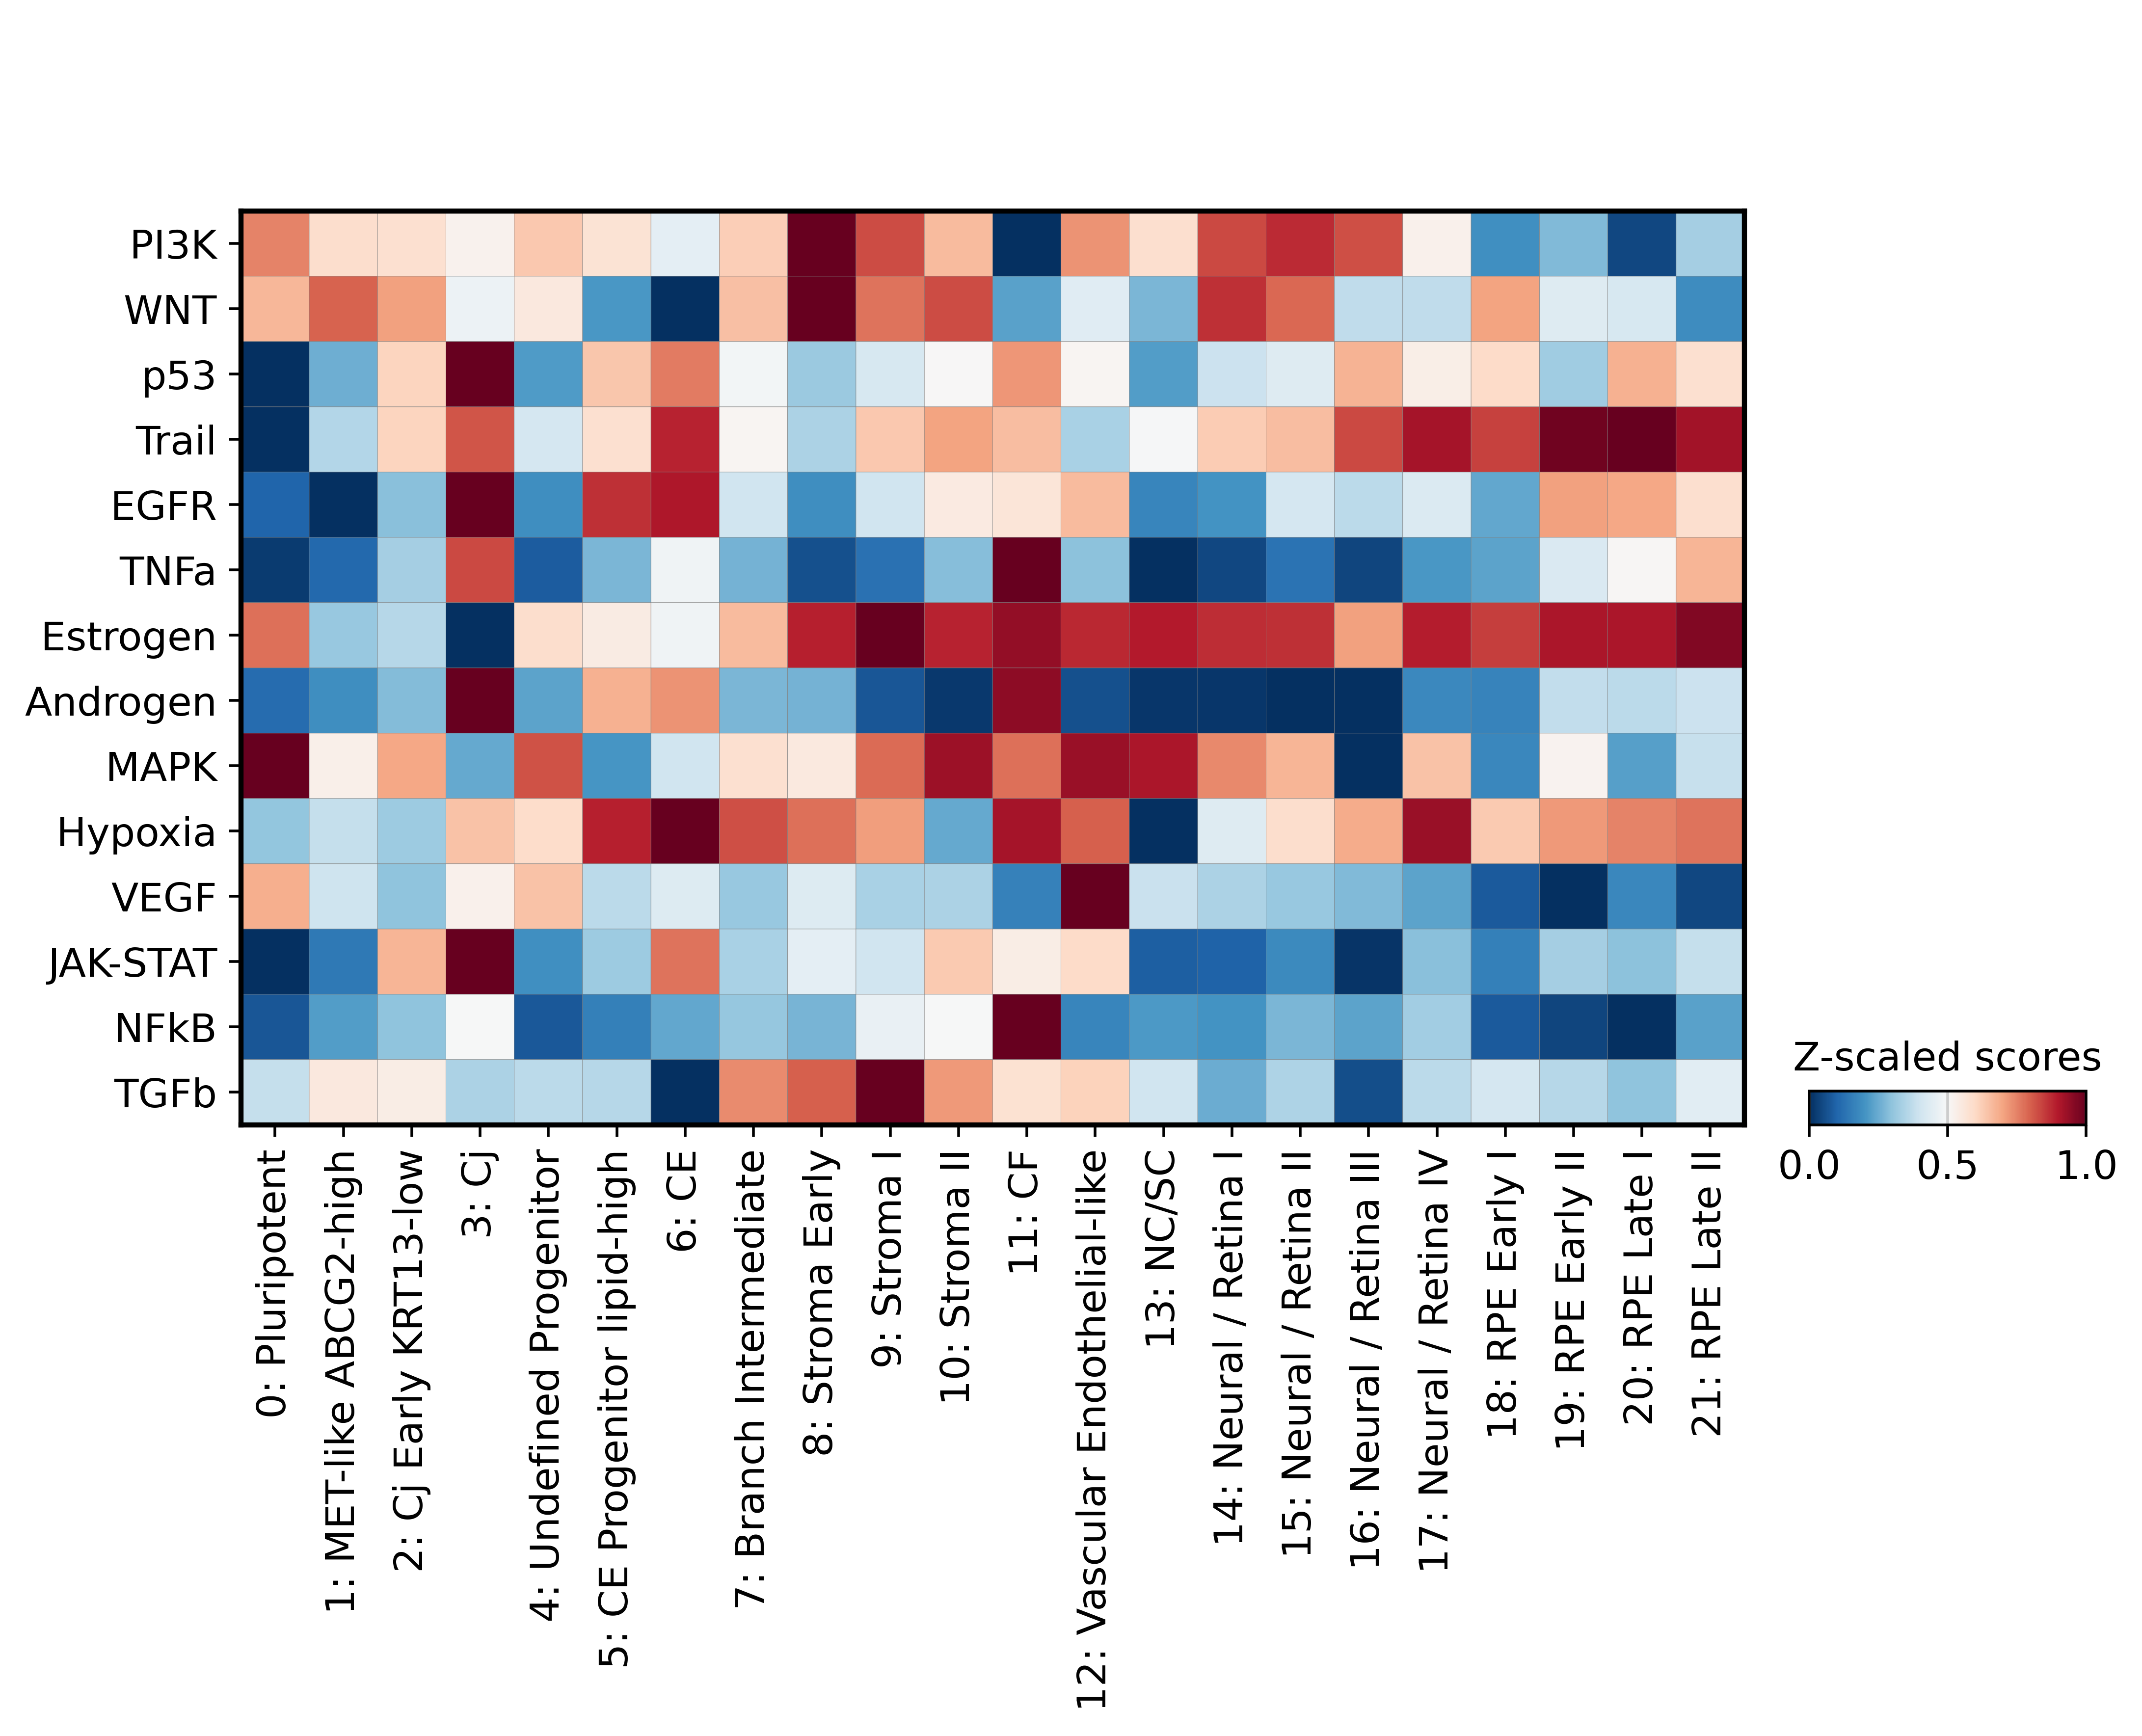

In [12]:
#Standard_scale "var" sets the original progeny scores between 0 and 1 to highlight the differences better
sc.pl.matrixplot(acts, var_names=["PI3K","WNT","p53","Trail","EGFR","TNFa","Estrogen","Androgen","MAPK","Hypoxia","VEGF","JAK-STAT","NFkB","TGFb"], groupby= 'RESOLUTION', dendrogram=False, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r', swap_axes=True)